### Question 
Classification: Decision Tree <br>
Dataset: pima-indians-diabetes.csv <br>
Create & evaluate the decision tree. <br>
Test the decision tree for any random sample.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
# Visualize the first rows of the dataset
df.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Separate features (X) and target variable (y)
X = df.drop('Class variable', axis=1)
y = df['Class variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

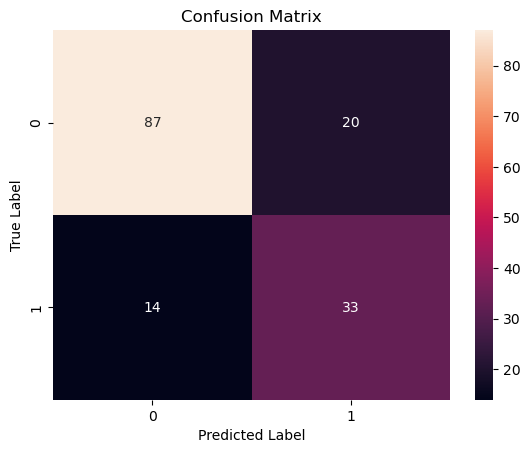

Accuracy: 0.7792


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix\
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display the accuracy
print(f'Accuracy: {accuracy:.4f}')

In [10]:
# Test the model on a random sample
random_sample_index = X.sample(1, random_state=42).index[0]
random_sample = X.loc[random_sample_index].values.reshape(1, -1)
random_sample_true_label = y.loc[random_sample_index]

random_sample_pred_label = model.predict(random_sample)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


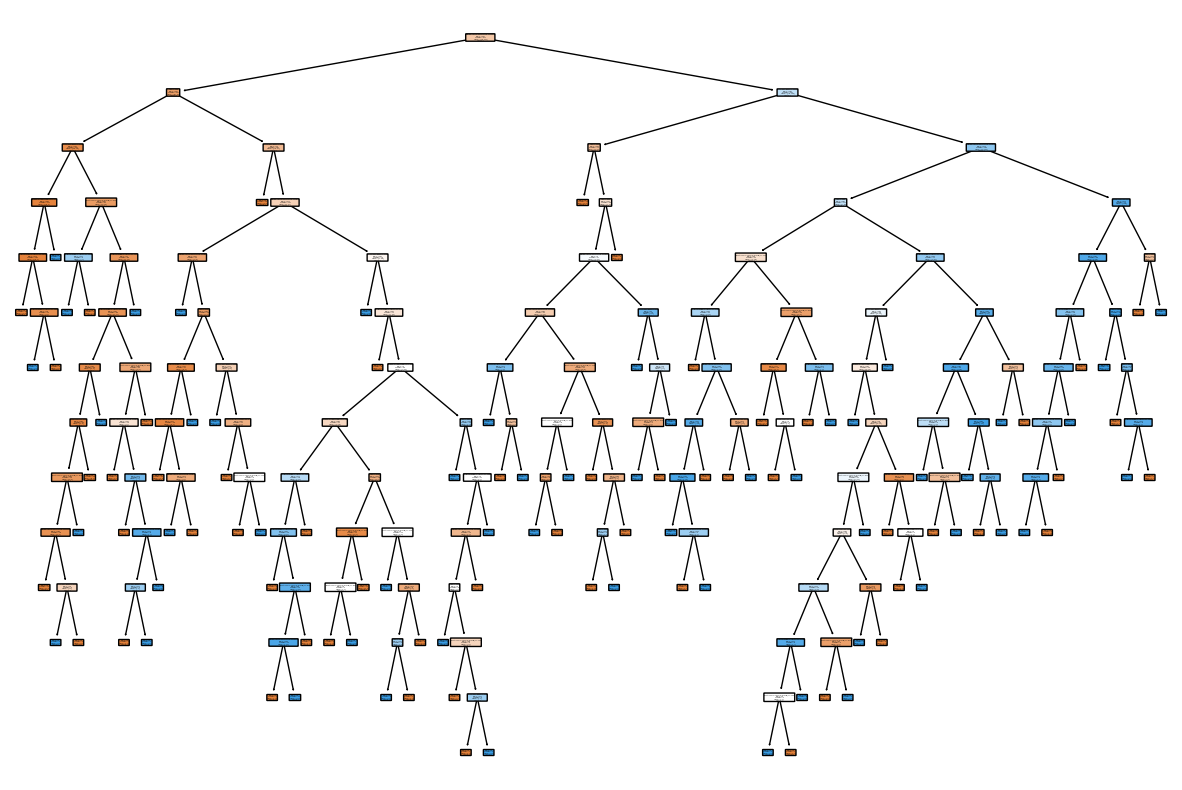

In [11]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()